In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\users\abhik\anaconda3\lib\site-packages (0.2.27)



In [3]:
pip install matplotlib

In [4]:
pip install pendulum

In [5]:
import yfinance as yf
import pendulum
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from matplotlib import mlab
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
pip install pandas_datareader

In [7]:
tickers_list=['SBIN.NS','AXISBANK.NS','^NSEI']

The download method in yahoo finance has the following parameters
    1.ticker : the name of the tickers
    2.period :  the number of days/ months of stock data(the valid frequencies  are 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max)
    3. interval : the frequency of stock market data(the valid intervals are 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo)

Start

In [8]:
#daily data
daily_data=yf.download(tickers=['SBIN.NS','AXISBANK.NS','^NSEI'],start='2008-01-01',end='2023-01-01' ,interval="1d")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [9]:
daily_data

,AXISBANK.NS,SBIN.NS,^NSEI
Date,,,
2008-01-01,173.331406,186.265472,6144.350098
2008-01-02,184.399078,189.379684,6179.399902
2008-01-03,184.612961,187.183746,6178.549805
2008-01-04,188.008133,186.679672,6274.299805
2008-01-07,194.290527,187.781616,6279.100098
...,...,...,...
2022-12-26,926.793396,585.718018,18014.599609
2022-12-27,930.286133,590.426575,18132.300781
2022-12-28,922.801575,589.592712,18122.500000


In [10]:
daily_data.dropna(how='any',inplace=True)

In [11]:
daily_data.rename(columns={'SBIN.NS':'STATE BANK','AXISBANK.NS':'AXIS BANK','^NSEI':'NIFTY 50'},inplace=True)
daily_data

,AXIS BANK,STATE BANK,NIFTY 50
Date,,,
2008-01-01,173.331406,186.265472,6144.350098
2008-01-02,184.399078,189.379684,6179.399902
2008-01-03,184.612961,187.183746,6178.549805
2008-01-04,188.008133,186.679672,6274.299805
2008-01-07,194.290527,187.781616,6279.100098
...,...,...,...
2022-12-26,926.793396,585.718018,18014.599609
2022-12-27,930.286133,590.426575,18132.300781
2022-12-28,922.801575,589.592712,18122.500000


In [12]:
daily_data[['nifty50DailyReturns','sbiDailyReturns','axisDailyReturns',]]=daily_data.iloc[:,0:3].pct_change()

In [13]:
daily_data

,AXIS BANK,STATE BANK,NIFTY 50,nifty50DailyReturns,sbiDailyReturns,axisDailyReturns
Date,,,,,,
2008-01-01,173.331406,186.265472,6144.350098,NaN,NaN,NaN
2008-01-02,184.399078,189.379684,6179.399902,0.063853,0.016719,0.005704
2008-01-03,184.612961,187.183746,6178.549805,0.001160,-0.011595,-0.000138
2008-01-04,188.008133,186.679672,6274.299805,0.018391,-0.002693,0.015497
2008-01-07,194.290527,187.781616,6279.100098,0.033416,0.005903,0.000765
...,...,...,...,...,...,...
2022-12-26,926.793396,585.718018,18014.599609,0.024377,0.040244,0.011670
2022-12-27,930.286133,590.426575,18132.300781,0.003769,0.008039,0.006534
2022-12-28,922.801575,589.592712,18122.500000,-0.008045,-0.001412,-0.000541


In [14]:
daily_data.dropna(how='any',inplace=True)

In [15]:
#monthly prices data
monthly_data=yf.download(tickers=['SBIN.NS','AXISBANK.NS','^NSEI'],start='2008-01-01',end='2023-01-01',interval="1mo")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [16]:
monthly_data

,AXISBANK.NS,SBIN.NS,^NSEI
Date,,,
2008-01-01,199.753052,179.512558,5137.450195
2008-02-01,182.242569,174.899185,5223.500000
2008-03-01,140.769928,132.542007,4734.500000
2008-04-01,164.598434,146.986862,5165.899902
2008-05-01,141.375900,119.683327,4870.100098
...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781
2022-09-01,731.694763,520.485596,17094.349609
2022-10-01,904.139954,562.862183,18012.199219


In [17]:
monthly_data.dropna(how='any',inplace=True)

In [18]:
monthly_data.rename(columns={'SBIN.NS':'STATE BANK','AXISBANK.NS':'AXIS BANK','^NSEI':'NIFTY 50'},inplace=True)

In [19]:
monthly_data

,AXIS BANK,STATE BANK,NIFTY 50
Date,,,
2008-01-01,199.753052,179.512558,5137.450195
2008-02-01,182.242569,174.899185,5223.500000
2008-03-01,140.769928,132.542007,4734.500000
2008-04-01,164.598434,146.986862,5165.899902
2008-05-01,141.375900,119.683327,4870.100098
...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781
2022-09-01,731.694763,520.485596,17094.349609
2022-10-01,904.139954,562.862183,18012.199219


In [20]:
monthly_data['sbiMonthlyReturns']= monthly_data['STATE BANK'].pct_change()
monthly_data['axisMonthlyReturns']= monthly_data['AXIS BANK'].pct_change()
monthly_data['nifty50MonthlyReturns']= monthly_data['NIFTY 50'].pct_change()

In [21]:
monthly_data

,AXIS BANK,STATE BANK,NIFTY 50,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns
Date,,,,,,
2008-01-01,199.753052,179.512558,5137.450195,NaN,NaN,NaN
2008-02-01,182.242569,174.899185,5223.500000,-0.025699,-0.087661,0.016750
2008-03-01,140.769928,132.542007,4734.500000,-0.242181,-0.227568,-0.093615
2008-04-01,164.598434,146.986862,5165.899902,0.108983,0.169273,0.091118
2008-05-01,141.375900,119.683327,4870.100098,-0.185755,-0.141086,-0.057260
...,...,...,...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781,0.005489,0.038488,0.035030
2022-09-01,731.694763,520.485596,17094.349609,-0.001224,-0.024351,-0.037442
2022-10-01,904.139954,562.862183,18012.199219,0.081417,0.235679,0.053693


In [22]:
monthly_data.dropna(how='any',inplace=True)

Mean/Expected monthly returns

In [23]:
print("Expected monthly returns of STATE BANK")
round(monthly_data['sbiMonthlyReturns'].mean(),5)

Expected monthly returns of STATE BANK


0.01313

In [24]:
print("Expected monthly returns of AXIS BANK")
round(monthly_data['axisMonthlyReturns'].mean(),5)

Expected monthly returns of AXIS BANK


0.01542

In [25]:
print("Expected monthly returns of NIFTY 50")
round(monthly_data['nifty50MonthlyReturns'].mean(),4)

Expected monthly returns of NIFTY 50


0.009

In [26]:
print("Expected risk associated with STATE BANK ")
round(monthly_data['sbiMonthlyReturns'].std(),4)

Expected risk associated with STATE BANK 


0.1145

In [27]:
print("Expected risk associated with AXIS BANK")
round(monthly_data['axisMonthlyReturns'].std(),5)

Expected risk associated with AXIS BANK


0.1153

In [28]:
print("Expected risk associated with NIFTY 50")
round(monthly_data['nifty50MonthlyReturns'].std(),5)

Expected risk associated with NIFTY 50


0.06125


Time Plots


In [29]:
from matplotlib import style

Text(0.5, 0, 'Index')

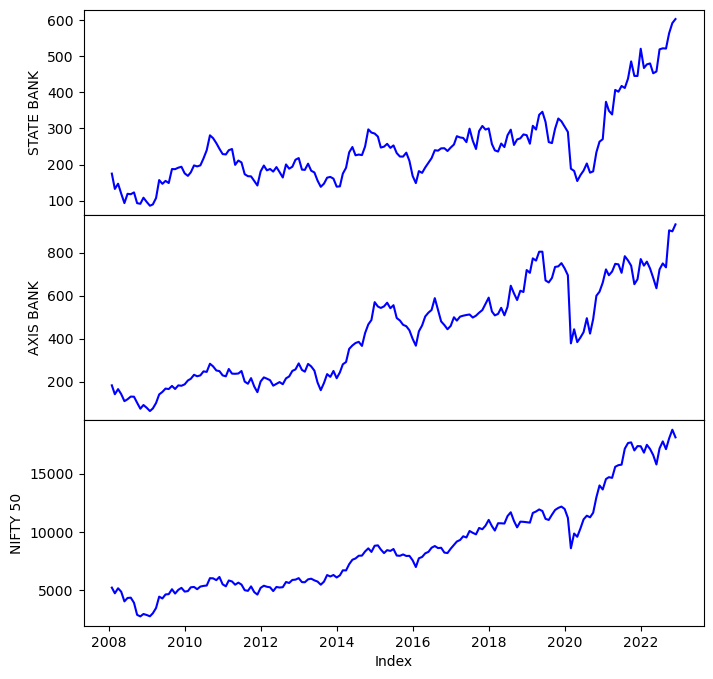

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3,sharex=True,subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.0)
ax1.plot(monthly_data.index, monthly_data['STATE BANK'], color='b')
ax1.set_ylabel("STATE BANK")
ax2.plot(monthly_data.index,monthly_data['AXIS BANK'] , color='b')
ax2.set_ylabel("AXIS BANK")
ax3.plot(monthly_data.index,monthly_data['NIFTY 50'] , color='b')
ax3.set_ylabel("NIFTY 50")
ax3.set_xlabel("Index")

Time plot for monthly returns

Text(0.5, 0, 'Index')

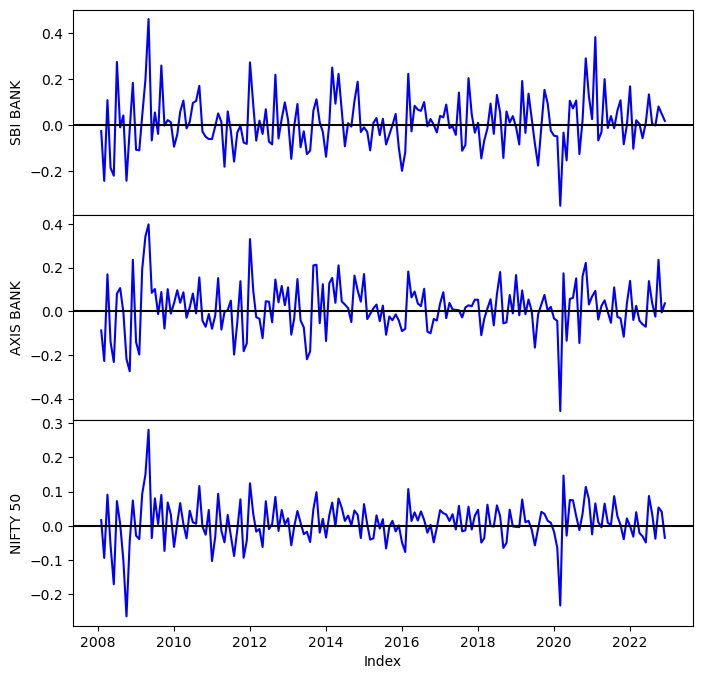

In [31]:
plt.style.use("default")
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3,sharex=True,subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.0)
ax1.plot(monthly_data.index, monthly_data['sbiMonthlyReturns'], color='b')
ax1.axhline(y=0,color='black')
ax1.set_ylabel("SBI BANK")
ax2.plot(monthly_data.index,monthly_data['axisMonthlyReturns'] , color='b')
ax2.axhline(y=0,color='black')
ax2.set_ylabel("AXIS BANK")
ax3.plot(monthly_data.index,monthly_data['nifty50MonthlyReturns'] , color='b')
ax3.axhline(y=0,color='black')
ax3.set_ylabel("NIFTY 50")
ax3.set_xlabel("Index")

Plotting all three returns on same graph with color variance


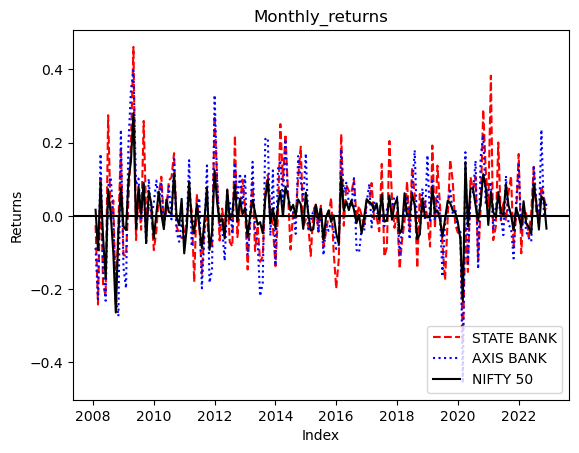

In [32]:
plt.plot(monthly_data['sbiMonthlyReturns'],'r--',label="STATE BANK")
plt.plot(monthly_data['axisMonthlyReturns'],'b',label="AXIS BANK",linestyle='dotted')
plt.plot(monthly_data['nifty50MonthlyReturns'],'k',label="NIFTY 50")
plt.title('Monthly_returns')
plt.legend(loc='lower right')
plt.axhline(y=0,color='black')
plt.xlabel("Index")
plt.ylabel("Returns")
plt.show()

Continuously compounded return monthly

In [33]:
monthly_data['sbiCCReturns']=np.log(monthly_data['STATE BANK']/monthly_data['STATE BANK'].shift(1))
monthly_data['axisCCReturns']=np.log(monthly_data['AXIS BANK']/monthly_data['AXIS BANK'].shift(1))
monthly_data['nifty50CCReturns']=np.log(monthly_data['NIFTY 50']/monthly_data['NIFTY 50'].shift(1))

In [34]:
monthly_data['sbiRetDiff']= monthly_data['sbiMonthlyReturns'] - monthly_data['sbiCCReturns']

Text(0.5, 0, 'Index')

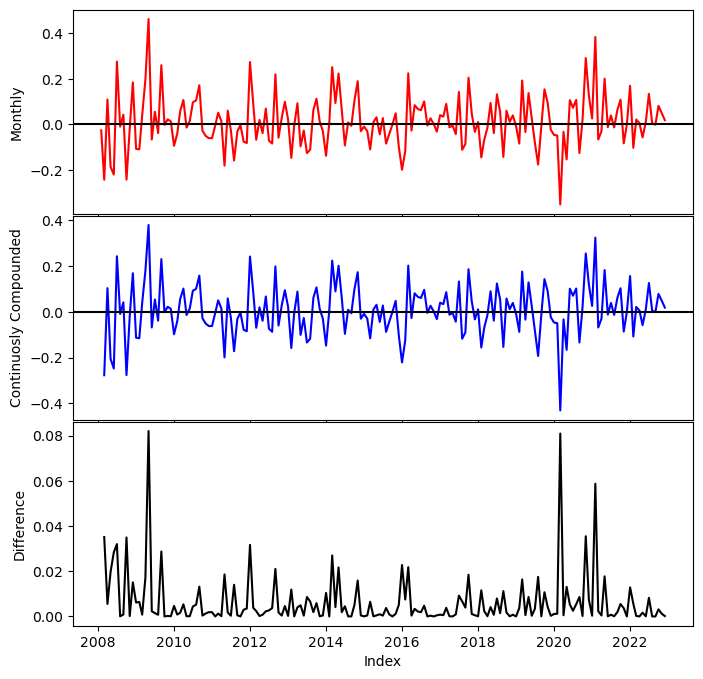

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.01)
ax1.plot(monthly_data.index, monthly_data['sbiMonthlyReturns'], color='r',label="Simple returns STATE BANK")
ax1.set_ylabel("Monthly")
ax1.axhline(y=0,color='black')
ax2.plot(monthly_data.index, monthly_data['sbiCCReturns'], color='b',label="Continuosly compounded returns STATE BANK")
ax2.set_ylabel("Continuosly Compounded")
ax2.axhline(y=0,color='black')
ax3.plot(monthly_data.index, monthly_data['sbiRetDiff'], color='k',label="Difference")
ax3.set_ylabel("Difference")
ax3.set_xlabel("Index")

Plotting Daily Returns


Text(0.5, 0, 'Index')

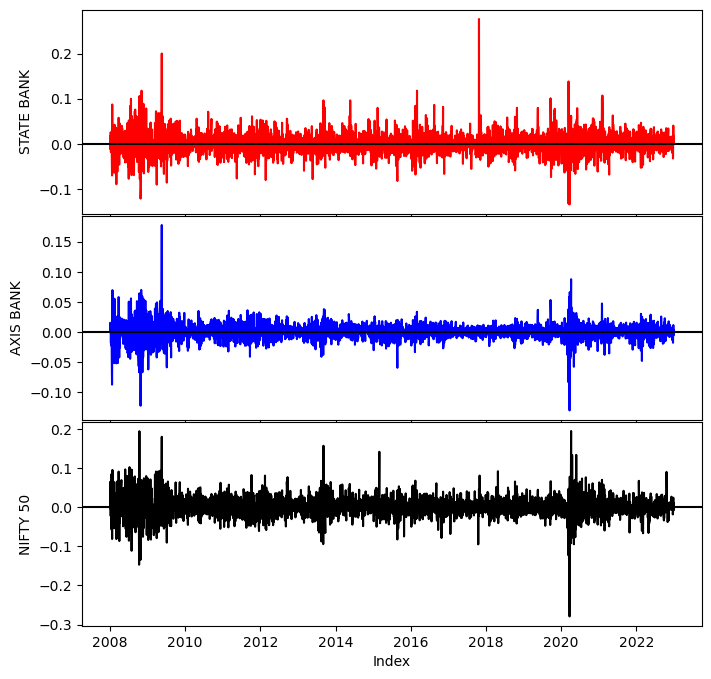

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.01)
ax1.plot(daily_data.index,daily_data['sbiDailyReturns'], color='r',label="STATE BANK")
ax1.set_ylabel("STATE BANK")
ax1.axhline(y=0,color='black')
ax2.plot(daily_data.index, daily_data['axisDailyReturns'], color='b',label="AXIS BANK")
ax2.set_ylabel("AXIS BANK")
ax2.axhline(y=0,color='black')
ax3.plot(daily_data.index, daily_data['nifty50DailyReturns'], color='k',label="NIFTY 50")
ax3.set_ylabel("NIFTY 50")
ax3.axhline(y=0,color='black')
ax3.set_xlabel("Index")


Plotting equity curves of monthly returns

In [37]:
sbi_eqtyCurve = np.cumprod(1 + monthly_data['sbiMonthlyReturns'])
axis_eqtyCurve = np.cumprod(1 +  monthly_data['axisMonthlyReturns'])
nifty50_eqtyCurve = np.cumprod(1 + monthly_data['nifty50MonthlyReturns'])

In [38]:
sbi_eqtyCurve

Date
2008-02-01    0.974301
2008-03-01    0.738344
2008-04-01    0.818811
2008-05-01    0.666713
2008-06-01    0.520257
                ...   
2022-08-01    2.902990
2022-09-01    2.899438
2022-10-01    3.135503
2022-11-01    3.292060
2022-12-01    3.353535
Name: sbiMonthlyReturns, Length: 179, dtype: float64

In [39]:
axis_eqtyCurve

Date
2008-02-01    0.912339
2008-03-01    0.704720
2008-04-01    0.824010
2008-05-01    0.707753
2008-06-01    0.543588
                ...   
2022-08-01    3.754421
2022-09-01    3.662997
2022-10-01    4.526289
2022-11-01    4.502558
2022-12-01    4.664925
Name: axisMonthlyReturns, Length: 179, dtype: float64

In [40]:
monthly_data

,AXIS BANK,STATE BANK,NIFTY 50,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns,sbiCCReturns,axisCCReturns,nifty50CCReturns,sbiRetDiff
Date,,,,,,,,,,
2008-02-01,182.242569,174.899185,5223.500000,-0.025699,-0.087661,0.016750,NaN,NaN,NaN,NaN
2008-03-01,140.769928,132.542007,4734.500000,-0.242181,-0.227568,-0.093615,-0.277310,-0.258212,-0.098292,3.512956e-02
2008-04-01,164.598434,146.986862,5165.899902,0.108983,0.169273,0.091118,0.103444,0.156382,0.087203,5.539642e-03
2008-05-01,141.375900,119.683327,4870.100098,-0.185755,-0.141086,-0.057260,-0.205494,-0.152086,-0.058965,1.973896e-02
2008-06-01,108.583290,93.392685,4040.550049,-0.219668,-0.231953,-0.170335,-0.248036,-0.263905,-0.186734,2.836791e-02
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781,0.005489,0.038488,0.035030,0.005474,0.037765,0.034430,1.500856e-05
2022-09-01,731.694763,520.485596,17094.349609,-0.001224,-0.024351,-0.037442,-0.001224,-0.024653,-0.038161,7.491812e-07
2022-10-01,904.139954,562.862183,18012.199219,0.081417,0.235679,0.053693,0.078273,0.211621,0.052301,3.144812e-03


In [41]:
monthly_data['sbi_cumRETURNS']=monthly_data['sbiCCReturns'].cumsum().apply(np.exp)
monthly_data['axis_cumRETURNS']=monthly_data['axisCCReturns'].cumsum().apply(np.exp)
monthly_data['nifty50_cumRETURNS']=monthly_data['nifty50CCReturns'].cumsum().apply(np.exp)

In [42]:
monthly_data

,AXIS BANK,STATE BANK,NIFTY 50,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns,sbiCCReturns,axisCCReturns,nifty50CCReturns,sbiRetDiff,sbi_cumRETURNS,axis_cumRETURNS,nifty50_cumRETURNS
Date,,,,,,,,,,,,,
2008-02-01,182.242569,174.899185,5223.500000,-0.025699,-0.087661,0.016750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,140.769928,132.542007,4734.500000,-0.242181,-0.227568,-0.093615,-0.277310,-0.258212,-0.098292,3.512956e-02,0.757819,0.772432,0.906385
2008-04-01,164.598434,146.986862,5165.899902,0.108983,0.169273,0.091118,0.103444,0.156382,0.087203,5.539642e-03,0.840409,0.903183,0.988973
2008-05-01,141.375900,119.683327,4870.100098,-0.185755,-0.141086,-0.057260,-0.205494,-0.152086,-0.058965,1.973896e-02,0.684299,0.775757,0.932344
2008-06-01,108.583290,93.392685,4040.550049,-0.219668,-0.231953,-0.170335,-0.248036,-0.263905,-0.186734,2.836791e-02,0.533980,0.595817,0.773533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781,0.005489,0.038488,0.035030,0.005474,0.037765,0.034430,1.500856e-05,2.979564,4.115159,3.399885
2022-09-01,731.694763,520.485596,17094.349609,-0.001224,-0.024351,-0.037442,-0.001224,-0.024653,-0.038161,7.491812e-07,2.975918,4.014950,3.272585
2022-10-01,904.139954,562.862183,18012.199219,0.081417,0.235679,0.053693,0.078273,0.211621,0.052301,3.144812e-03,3.218209,4.961190,3.448301


In [43]:
monthly_data.dropna(inplace=True)
monthly_data

,AXIS BANK,STATE BANK,NIFTY 50,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns,sbiCCReturns,axisCCReturns,nifty50CCReturns,sbiRetDiff,sbi_cumRETURNS,axis_cumRETURNS,nifty50_cumRETURNS
Date,,,,,,,,,,,,,
2008-03-01,140.769928,132.542007,4734.500000,-0.242181,-0.227568,-0.093615,-0.277310,-0.258212,-0.098292,3.512956e-02,0.757819,0.772432,0.906385
2008-04-01,164.598434,146.986862,5165.899902,0.108983,0.169273,0.091118,0.103444,0.156382,0.087203,5.539642e-03,0.840409,0.903183,0.988973
2008-05-01,141.375900,119.683327,4870.100098,-0.185755,-0.141086,-0.057260,-0.205494,-0.152086,-0.058965,1.973896e-02,0.684299,0.775757,0.932344
2008-06-01,108.583290,93.392685,4040.550049,-0.219668,-0.231953,-0.170335,-0.248036,-0.263905,-0.186734,2.836791e-02,0.533980,0.595817,0.773533
2008-07-01,117.350006,119.072334,4332.950195,0.274964,0.080737,0.072366,0.242918,0.077643,0.069868,3.204611e-02,0.680806,0.643922,0.829511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,749.957092,521.123230,17759.300781,0.005489,0.038488,0.035030,0.005474,0.037765,0.034430,1.500856e-05,2.979564,4.115159,3.399885
2022-09-01,731.694763,520.485596,17094.349609,-0.001224,-0.024351,-0.037442,-0.001224,-0.024653,-0.038161,7.491812e-07,2.975918,4.014950,3.272585
2022-10-01,904.139954,562.862183,18012.199219,0.081417,0.235679,0.053693,0.078273,0.211621,0.052301,3.144812e-03,3.218209,4.961190,3.448301


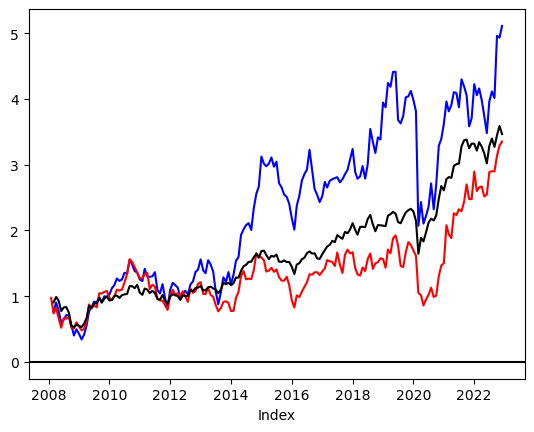

In [44]:
plt.plot( monthly_data['axis_cumRETURNS'],color='b',label=" AXIS BANK")
plt.plot(sbi_eqtyCurve,color='r',label=" STATE BANK")
plt.plot(monthly_data['nifty50_cumRETURNS'],color='k',label=" NIFTY 50")
plt.xlabel("Index")
plt.axhline(y=0,color='black')

Expected Daily returns and std deviations



In [45]:
print("Expected daily returns of AXIS BANK is")
daily_data['axisDailyReturns'].mean()

Expected daily returns of AXIS BANK is


0.00038856978362921047

In [46]:
print("Expected daily returns of STATE BANK is")
daily_data['sbiDailyReturns'].mean()

Expected daily returns of STATE BANK is


0.0005956414470923227

In [47]:
print("Expected daily returns of NIFTY 50 is")
round(daily_data['nifty50DailyReturns'].mean(),4)

Expected daily returns of NIFTY 50 is


0.0008

In [48]:
print("Expected risk associated with AXIS BANK")
round(daily_data['axisDailyReturns'].std(),4)

Expected risk associated with AXIS BANK


0.0137

In [49]:
print("Expected risk associated with SBI BANK")
round(daily_data['sbiDailyReturns'].std(),4)

Expected risk associated with SBI BANK


0.0236

In [50]:
print("Expected risk associated with NIFTY 50")
round(daily_data['nifty50DailyReturns'].std(),4)

Expected risk associated with NIFTY 50


0.0259

In [51]:
daily_data['axisCCReturns']=np.log(daily_data['AXIS BANK']/daily_data['AXIS BANK'].shift(1))
daily_data['sbiCCReturns']=np.log(daily_data['STATE BANK']/daily_data['STATE BANK'].shift(1))
daily_data['nifty50CCReturns']=np.log(daily_data['NIFTY 50']/daily_data['NIFTY 50'].shift(1))

In [52]:
daily_data['axis_cumRETURNS']=daily_data['axisCCReturns'].cumsum().apply(np.exp)
daily_data['sbi_cumRETURNS']=daily_data['sbiCCReturns'].cumsum().apply(np.exp)
daily_data['nifty50_cumRETURNS']=daily_data['nifty50CCReturns'].cumsum().apply(np.exp)

In [53]:
daily_data

,AXIS BANK,STATE BANK,NIFTY 50,nifty50DailyReturns,sbiDailyReturns,axisDailyReturns,axisCCReturns,sbiCCReturns,nifty50CCReturns,axis_cumRETURNS,sbi_cumRETURNS,nifty50_cumRETURNS
Date,,,,,,,,,,,,
2008-01-02,184.399078,189.379684,6179.399902,0.063853,0.016719,0.005704,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,184.612961,187.183746,6178.549805,0.001160,-0.011595,-0.000138,0.001159,-0.011663,-0.000138,1.001160,0.988405,0.999862
2008-01-04,188.008133,186.679672,6274.299805,0.018391,-0.002693,0.015497,0.018224,-0.002697,0.015378,1.019572,0.985743,1.015357
2008-01-07,194.290527,187.781616,6279.100098,0.033416,0.005903,0.000765,0.032869,0.005886,0.000765,1.053642,0.991562,1.016134
2008-01-08,189.941818,192.599396,6287.850098,-0.022383,0.025656,0.001394,-0.022637,0.025333,0.001393,1.030058,1.017001,1.017550
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,926.793396,585.718018,18014.599609,0.024377,0.040244,0.011670,0.024084,0.039455,0.011602,5.026020,3.092824,2.915267
2022-12-27,930.286133,590.426575,18132.300781,0.003769,0.008039,0.006534,0.003762,0.008007,0.006512,5.044961,3.117687,2.934314
2022-12-28,922.801575,589.592712,18122.500000,-0.008045,-0.001412,-0.000541,-0.008078,-0.001413,-0.000541,5.004372,3.113284,2.932728


Histograms

In [54]:
from matplotlib import pyplot as plt


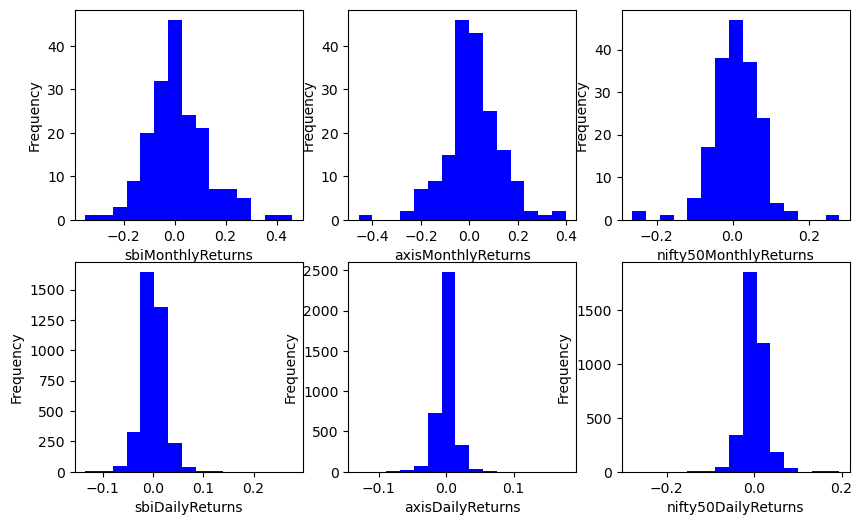

In [55]:
plt.subplots(figsize=(10,6))
plt.subplot(231)

monthly_data['sbiMonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("sbiMonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(232)
monthly_data['axisMonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("axisMonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(233)
monthly_data['nifty50MonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("nifty50MonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(234)
daily_data['sbiDailyReturns'].hist(color="blue",bins=15)
plt.xlabel("sbiDailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(235)
daily_data['axisDailyReturns'].hist(color="blue",bins=15)
plt.xlabel("axisDailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(236)
daily_data['nifty50DailyReturns'].hist(color="blue",bins=15)
plt.xlabel("nifty50DailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
fig.tight_layout(pad=7)


Checking for normal distribution of data

In [56]:
import random 
random.seed(123)

In [57]:
mu=round(daily_data['sbiDailyReturns'].mean(),4)
sigma=round(daily_data['sbiDailyReturns'].std(),4)

sbi_gwnDaily =  np.random.normal(round(daily_data['sbiDailyReturns'].mean(),4),round(daily_data['sbiDailyReturns'].std(),4),size=len(daily_data['sbiDailyReturns'])) 
sbi_gwnMonthly = np.random.normal(round(monthly_data['sbiMonthlyReturns'].mean(),4),round(monthly_data['sbiMonthlyReturns'].std(),4),size=len(monthly_data['sbiMonthlyReturns']))

#creating simulated data 
axis_gwnDaily = np.random.normal(round(daily_data['axisDailyReturns'].mean(),4),round(daily_data['axisDailyReturns'].std(),4),size=len(daily_data['axisDailyReturns']))
axis_gwnMonthly = np.random.normal(round(monthly_data['axisMonthlyReturns'].mean(),4),round(monthly_data['axisMonthlyReturns'].std(),4),size=len(monthly_data['axisMonthlyReturns']))


In [58]:
nifty50_gwnDaily = np.random.normal(round(daily_data['nifty50DailyReturns'].mean(),4),round(daily_data['nifty50DailyReturns'].std(),4),size=len(daily_data['nifty50DailyReturns']))
nifty50_gwnMonthly = np.random.normal(round(monthly_data['nifty50MonthlyReturns'].mean(),4),round(monthly_data['nifty50MonthlyReturns'].std(),4),size=len(monthly_data['nifty50MonthlyReturns']))


In [59]:
gwn_Daily=pd.DataFrame({'sbi_gwnDaily': sbi_gwnDaily, 'axis_gwnDaily':axis_gwnDaily,'nifty50_gwnDaily':nifty50_gwnDaily}, columns=['sbi_gwnDaily','axis_gwnDaily','nifty50_gwnDaily'],index=daily_data.index)
gwn_Daily

,sbi_gwnDaily,axis_gwnDaily,nifty50_gwnDaily
Date,,,
2008-01-02,0.028375,0.014066,-0.009630
2008-01-03,-0.048177,0.003360,-0.027406
2008-01-04,0.017599,0.003304,-0.006963
2008-01-07,-0.003124,-0.024651,0.004545
2008-01-08,-0.006354,-0.013531,0.007095
...,...,...,...
2022-12-26,0.002959,-0.013543,0.016987
2022-12-27,-0.021612,-0.008488,0.009164
2022-12-28,-0.003325,0.012561,0.002909


In [60]:
gwn_Monthly=pd.DataFrame({'sbi_gwnMonthly': sbi_gwnMonthly, 'axis_gwnMonthly':axis_gwnMonthly,'nifty50_gwnMonthly':nifty50_gwnMonthly}, columns=['sbi_gwnMonthly','axis_gwnMonthly','nifty50_gwnMonthly'],index=monthly_data.index)
gwn_Monthly

,sbi_gwnMonthly,axis_gwnMonthly,nifty50_gwnMonthly
Date,,,
2008-03-01,-0.013591,-0.063851,-0.031033
2008-04-01,0.032303,0.027791,0.104335
2008-05-01,-0.067360,0.177084,0.017759
2008-06-01,-0.283802,0.064650,0.000457
2008-07-01,-0.026961,-0.012011,-0.000964
...,...,...,...
2022-08-01,0.094980,-0.131471,-0.050390
2022-09-01,0.048853,-0.006053,0.006956
2022-10-01,-0.137076,0.017604,0.076879


In [61]:
#checking if any null values in data
gwn_Daily.isnull().sum()

sbi_gwnDaily        0
axis_gwnDaily       0
nifty50_gwnDaily    0
dtype: int64

Text(0, 0.5, 'Frequency')

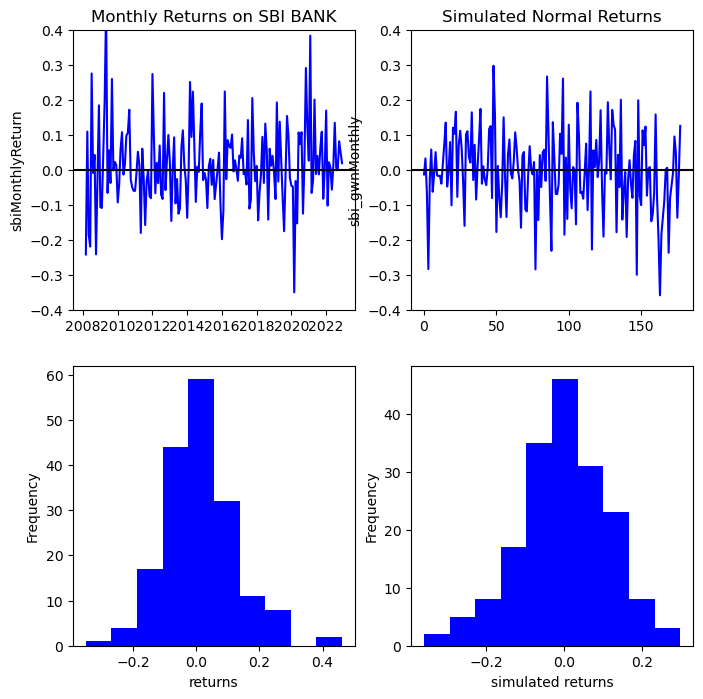

In [62]:
plt.subplots(figsize=(8,8))
plt.subplot(221)
plt.plot(monthly_data["sbiMonthlyReturns"],color="blue")
plt.axhline(y=0,color='black')
plt.title("Monthly Returns on SBI BANK")
plt.ylabel("sbiMonthlyReturn")
plt.ylim([-0.4,0.4])

plt.subplot(222)
plt.plot(sbi_gwnMonthly,color="blue")
plt.axhline(y=0,color='black')
plt.title("Simulated Normal Returns")
plt.ylabel("sbi_gwnMonthly")
plt.ylim([-0.4,0.4])

#Histograms
plt.subplot(223)
plt.hist(monthly_data['sbiMonthlyReturns'],color="blue")
plt.xlabel("returns")
plt.ylabel("Frequency")

plt.subplot(224)
plt.hist(sbi_gwnMonthly,color="blue")
plt.xlabel("simulated returns")
plt.ylabel("Frequency")






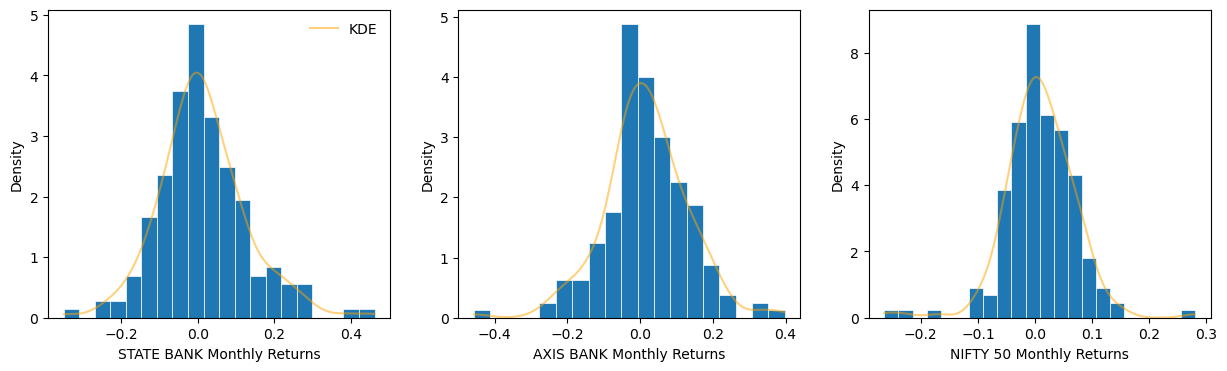

In [63]:
#  seaborn histogram overlaid with KDE
plt.subplots(figsize=(15,4))
plt.subplot(131)
ax = sns.histplot(data=monthly_data['sbiMonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("STATE BANK Monthly Returns")
# Edit legemd and add title
ax.legend(frameon=False)


plt.subplot(132)
ax = sns.histplot(data=monthly_data['axisMonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("AXIS BANK Monthly Returns")

plt.subplot(133)
ax = sns.histplot(data=monthly_data['nifty50MonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("NIFTY 50 Monthly Returns")



plt.show()

Quantiles of Returns

In [64]:
monthly_data["sbiMonthlyReturns"].quantile()
monthly_data["sbiMonthlyReturns"].quantile([0.01,0.05])




0.01   -0.241789
0.05   -0.154022
Name: sbiMonthlyReturns, dtype: float64

In [65]:
#infosys quantiles
print(monthly_data["axisMonthlyReturns"].quantile(q=[0.25,0.5,0.75,1]))
print(monthly_data["axisMonthlyReturns"].quantile([0.01,0.05]))

0.25   -0.042583
0.50    0.015943
0.75    0.086465
1.00    0.397721
Name: axisMonthlyReturns, dtype: float64
0.01   -0.241706
0.05   -0.182699
Name: axisMonthlyReturns, dtype: float64


In [66]:
#s&p quantiles
print(monthly_data["nifty50MonthlyReturns"].quantile(q=[0.25,0.5,0.75,1]))
print(monthly_data["nifty50MonthlyReturns"].quantile([0.01,0.05]))

0.25   -0.025525
0.50    0.005942
0.75    0.044250
1.00    0.280660
Name: nifty50MonthlyReturns, dtype: float64
0.01   -0.184625
0.05   -0.073671
Name: nifty50MonthlyReturns, dtype: float64


Median and IQR

In [67]:
#monthly data
print(monthly_data["sbiMonthlyReturns"].median())
print(monthly_data["axisMonthlyReturns"].median())
print(monthly_data["nifty50MonthlyReturns"].median())


0.0034226567016405474
0.01594308449466908
0.005942214331573603


In [68]:
#IQR
Q1, Q3 = monthly_data["sbiMonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.11864065832773754


In [69]:
#IQR
Q1, Q3 = monthly_data["axisMonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.12904822626682266


In [70]:
#IQR
Q1, Q3 = monthly_data["nifty50MonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.0697747659321293


Value at Risk

In [71]:
W = 100000
sbiQuantiles = monthly_data["sbiMonthlyReturns"].quantile([0.01, 0.05])
axisQuantiles = monthly_data["axisMonthlyReturns"].quantile([0.01, 0.05])
nifty50Quantiles = monthly_data["nifty50MonthlyReturns"].quantile([0.01, 0.05])
sbiVaR = W*sbiQuantiles
axisVaR = W*axisQuantiles
nifty50VaR = W*nifty50Quantiles

print(sbiVaR)
print(axisVaR)
print(nifty50VaR)

0.01   -24178.861859
0.05   -15402.210654
Name: sbiMonthlyReturns, dtype: float64
0.01   -24170.644332
0.05   -18269.879622
Name: axisMonthlyReturns, dtype: float64
0.01   -18462.484070
0.05    -7367.065308
Name: nifty50MonthlyReturns, dtype: float64


In [72]:
pip install statsmodels

In [73]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [75]:
from scipy import stats

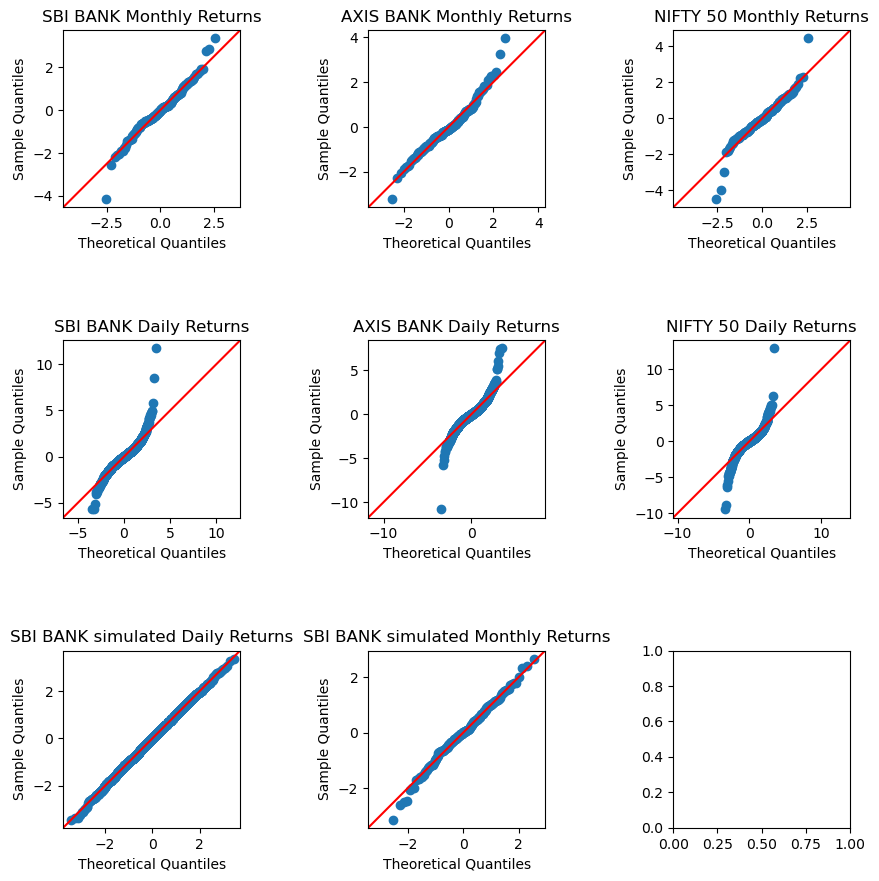

In [76]:
import statsmodels.api as sm
fig, axes = plt.subplots(ncols=3, nrows=3 ,figsize=(10,10))
a=np.ravel(axes)

sm.qqplot(monthly_data.iloc[1:,4],line='45',fit=True,dist=stats.norm,ax=a[0])
a[0].set_title('SBI BANK Monthly Returns')

sm.qqplot(monthly_data.iloc[1:,3],line='45',fit=True,dist=stats.norm,ax=a[1])
a[1].set_title("AXIS BANK Monthly Returns")

#S&P500_RETURNS has column number 5

sm.qqplot(monthly_data.iloc[1:,5],line='45',fit=True,dist=stats.norm,ax=a[2])
a[2].set_title("NIFTY 50 Monthly Returns")

#daily returns
#TCS_RETURNS has column number 4

sm.qqplot(daily_data.iloc[1:,4],line='45',fit=True,dist=stats.norm,ax=a[3])
a[3].set_title("SBI BANK Daily Returns")


#INFY_RETURNS has column number 3

sm.qqplot(daily_data.iloc[1:,3],line='45',fit=True,dist=stats.norm,ax=a[4])
a[4].set_title("AXIS BANK Daily Returns")


#S&P500_RETURNS has column number 5

sm.qqplot(daily_data.iloc[1:,5],line='45',fit=True,dist=stats.norm,ax=a[5])
a[5].set_title("NIFTY 50 Daily Returns")


#TCS daily simulated returns

sm.qqplot(sbi_gwnDaily,line='45',fit=True,dist=stats.norm,ax=a[6])
a[6].set_title("SBI BANK simulated Daily Returns")
#TCS monthly simulated returns

sm.qqplot(sbi_gwnMonthly,line='45',fit=True,dist=stats.norm,ax=a[7])
a[7].set_title("SBI BANK simulated Monthly Returns")


fig.tight_layout(pad=5.0)
 
plt.show()

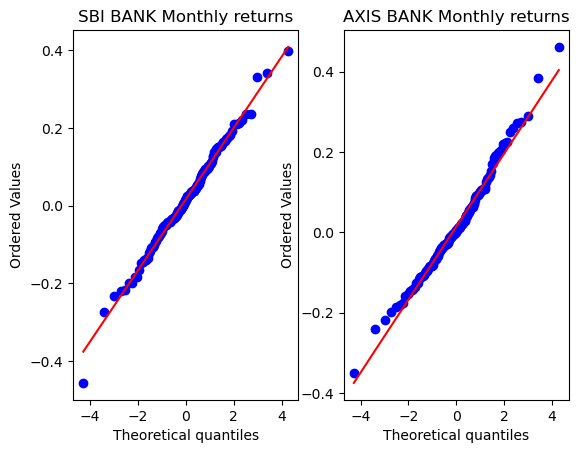

In [77]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
#SBI BANK monthly returns
stats.probplot(monthly_data.iloc[2:,4], dist=stats.t(df=5), plot=ax1)
ax1.set_title("SBI BANK Monthly returns")
ax2 = fig.add_subplot(122)
stats.probplot(monthly_data.iloc[2:,3], dist=stats.t(df=5), plot=ax2)
ax2.set_title("AXIS BANK Monthly returns")
plt.show()

In [78]:
df=pd.DataFrame(monthly_data[["sbiMonthlyReturns","axisMonthlyReturns","nifty50MonthlyReturns"]])


In [79]:
print(df.describe())
print("Variance:\n",df.var())
print("Standard deviation:\n",df.std())
print("Skewness:\n",df.skew())
print("Kurtosis:\n",df.kurt())

       sbiMonthlyReturns  axisMonthlyReturns  nifty50MonthlyReturns
count         178.000000          178.000000             178.000000
mean            0.013348            0.015995               0.008916
std             0.114800            0.115366               0.061423
min            -0.350330           -0.456475              -0.264103
25%            -0.049836           -0.042583              -0.025525
50%             0.003423            0.015943               0.005942
75%             0.068804            0.086465               0.044250
max             0.461638            0.397721               0.280660
Variance:
 sbiMonthlyReturns        0.013179
axisMonthlyReturns       0.013309
nifty50MonthlyReturns    0.003773
dtype: float64
Standard deviation:
 sbiMonthlyReturns        0.114800
axisMonthlyReturns       0.115366
nifty50MonthlyReturns    0.061423
dtype: float64
Skewness:
 sbiMonthlyReturns        0.506728
axisMonthlyReturns      -0.125566
nifty50MonthlyReturns   -0.313326
dtype: fl

In [80]:
#daily statistics
df_daily=pd.DataFrame(daily_data[["sbiDailyReturns","axisDailyReturns","nifty50DailyReturns"]])

In [81]:
print(df_daily.describe())
print("Variance:\n",df_daily.var())
print("Standard deviation:\n",df_daily.std())
print("Skewness:\n",df_daily.skew())
print("Kurtosis:\n",df_daily.kurt())

       sbiDailyReturns  axisDailyReturns  nifty50DailyReturns
count      3674.000000       3674.000000          3674.000000
mean          0.000596          0.000389             0.000793
std           0.023621          0.013735             0.025866
min          -0.134620         -0.129805            -0.279108
25%          -0.012472         -0.005641            -0.012048
50%           0.000390          0.000596             0.000139
75%           0.012825          0.006884             0.013067
max           0.276872          0.177441             0.194807
Variance:
 sbiDailyReturns        0.000558
axisDailyReturns       0.000189
nifty50DailyReturns    0.000669
dtype: float64
Standard deviation:
 sbiDailyReturns        0.023621
axisDailyReturns       0.013735
nifty50DailyReturns    0.025866
dtype: float64
Skewness:
 sbiDailyReturns        0.739088
axisDailyReturns       0.043989
nifty50DailyReturns    0.078770
dtype: float64
Kurtosis:
 sbiDailyReturns         8.953614
axisDailyReturns      

Effect of outliers


In [82]:
gwn_Monthly.describe()

,sbi_gwnMonthly,axis_gwnMonthly,nifty50_gwnMonthly
count,178.000000,178.000000,178.000000
mean,-0.003980,0.007122,0.009608
std,0.113574,0.121813,0.060334
min,-0.358742,-0.330700,-0.116969
25%,-0.069513,-0.067911,-0.035870
50%,-0.002755,0.023824,0.007002
75%,0.070868,0.082645,0.049364
max,0.297235,0.293725,0.177175


In [83]:
print(gwn_Monthly.describe())
print("Variance:\n",gwn_Monthly.var())
print("Standard deviation:\n",gwn_Monthly.std())
print("Skewness:\n",gwn_Monthly.skew())
print("Kurtosis:\n",gwn_Monthly.kurt())


       sbi_gwnMonthly  axis_gwnMonthly  nifty50_gwnMonthly
count      178.000000       178.000000          178.000000
mean        -0.003980         0.007122            0.009608
std          0.113574         0.121813            0.060334
min         -0.358742        -0.330700           -0.116969
25%         -0.069513        -0.067911           -0.035870
50%         -0.002755         0.023824            0.007002
75%          0.070868         0.082645            0.049364
max          0.297235         0.293725            0.177175
Variance:
 sbi_gwnMonthly        0.012899
axis_gwnMonthly       0.014838
nifty50_gwnMonthly    0.003640
dtype: float64
Standard deviation:
 sbi_gwnMonthly        0.113574
axis_gwnMonthly       0.121813
nifty50_gwnMonthly    0.060334
dtype: float64
Skewness:
 sbi_gwnMonthly       -0.201274
axis_gwnMonthly      -0.342835
nifty50_gwnMonthly    0.210581
dtype: float64
Kurtosis:
 sbi_gwnMonthly        0.349372
axis_gwnMonthly      -0.040600
nifty50_gwnMonthly   -0.27688

In [84]:
sbi_gwnMonthlyOutlier =gwn_Monthly["sbi_gwnMonthly"]
axis_gwnMonthlyOutlier = gwn_Monthly["axis_gwnMonthly"]
nifty50_gwnMonthlyOutlier = gwn_Monthly["nifty50_gwnMonthly"]

In [85]:
sbi_gwnMonthlyOutlier[20] = round((gwn_Monthly["sbi_gwnMonthly"].std()*(-6)),4)
axis_gwnMonthlyOutlier[20] = round((gwn_Monthly["axis_gwnMonthly"].std()*(-6)),4)
nifty50_gwnMonthlyOutlier[20] = round((gwn_Monthly["nifty50_gwnMonthly"].std()*(-6)),4)

Text(0.5, 0, 'Index')

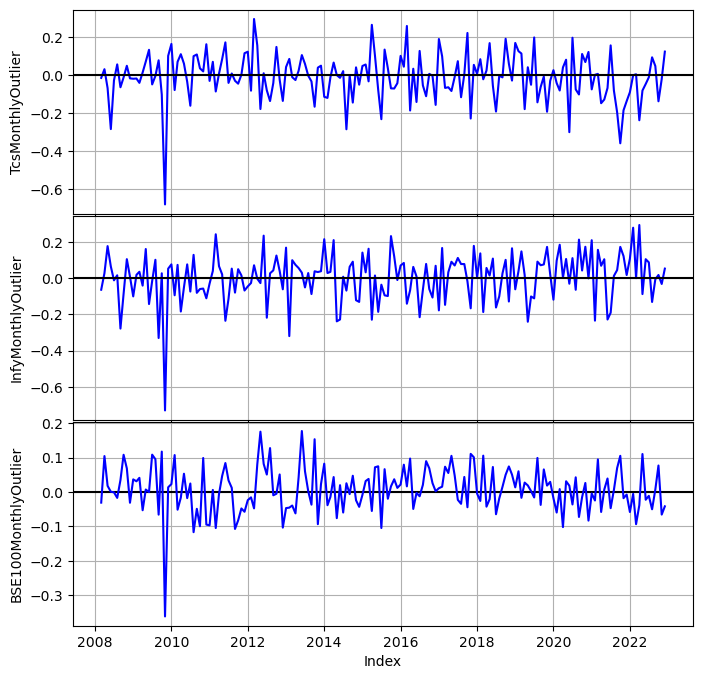

In [88]:
w = gwn_Monthly.index
x = sbi_gwnMonthlyOutlier
y = axis_gwnMonthlyOutlier
z = nifty50_gwnMonthlyOutlier

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.axhline(y=0,color='black')
plt.subplots_adjust(hspace=0.01)


ax1.grid()
ax2.grid()
ax3.grid()


ax1.plot(w, x, color='b')
ax1.set_ylabel("TcsMonthlyOutlier")
ax1.axhline(y=0,color='black')

ax2.plot(w, y, color='b')
ax2.set_ylabel("InfyMonthlyOutlier")
ax2.axhline(y=0,color='black')

ax3.plot(w, z, color='b')
ax3.set_ylabel("BSE100MonthlyOutlier")

ax3.set_xlabel("Index")

<AxesSubplot:>

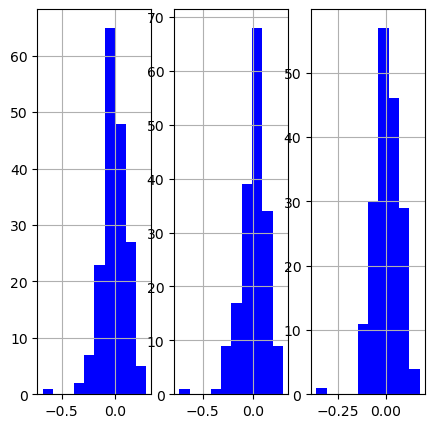

In [90]:
plt.subplots(figsize=(5,5))
plt.subplot(131)
sbi_gwnMonthlyOutlier.hist(color='blue')
plt.subplot(132)
axis_gwnMonthlyOutlier.hist(color='blue')
plt.subplot(133)
nifty50_gwnMonthlyOutlier.hist(color='blue')

In [91]:
print(gwn_Daily.describe())
print("Variance:\n",gwn_Monthly.var())
print("Standard deviation:\n",gwn_Monthly.std())
print("Skewness:\n",gwn_Monthly.skew())
print("Kurtosis:\n",gwn_Monthly.kurt())

       sbi_gwnDaily  axis_gwnDaily  nifty50_gwnDaily
count   3674.000000    3674.000000       3674.000000
mean       0.000264       0.000515          0.001000
std        0.023645       0.013628          0.025769
min       -0.081014      -0.044436         -0.089284
25%       -0.015991      -0.008935         -0.015982
50%        0.000424       0.000641          0.000795
75%        0.016221       0.009679          0.018449
max        0.079890       0.044073          0.099704
Variance:
 sbi_gwnMonthly        0.015385
axis_gwnMonthly       0.017880
nifty50_gwnMonthly    0.004416
dtype: float64
Standard deviation:
 sbi_gwnMonthly        0.124035
axis_gwnMonthly       0.133717
nifty50_gwnMonthly    0.066453
dtype: float64
Skewness:
 sbi_gwnMonthly       -0.980895
axis_gwnMonthly      -1.132965
nifty50_gwnMonthly   -0.747091
dtype: float64
Kurtosis:
 sbi_gwnMonthly        4.379637
axis_gwnMonthly       4.308370
nifty50_gwnMonthly    4.447935
dtype: float64


Boxplot,
Sample Autocorrelation Plots,
Scatter plots,
pairs plot,
covariance ,
Correlation and 
Correlation plots

<function matplotlib.pyplot.show(close=None, block=None)>

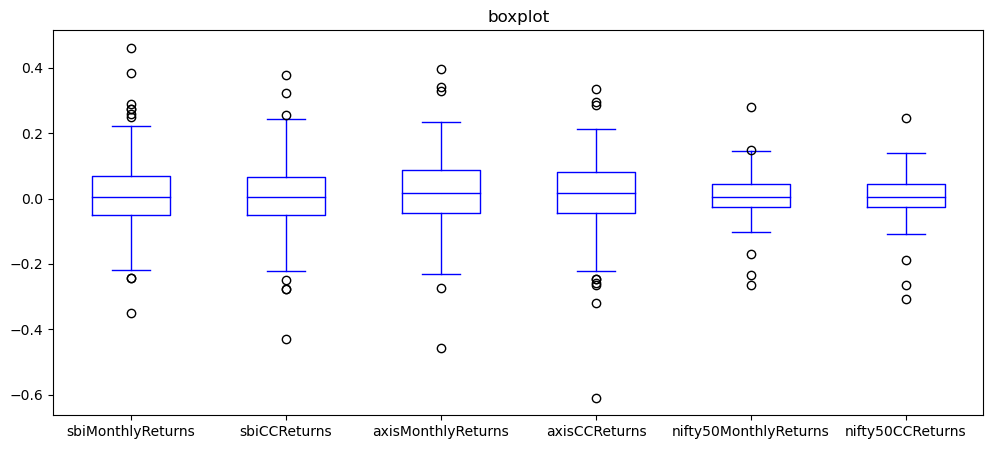

In [93]:
#Boxplots
ax = monthly_data[['sbiMonthlyReturns','sbiCCReturns','axisMonthlyReturns','axisCCReturns','nifty50MonthlyReturns','nifty50CCReturns']].plot(kind='box', title='boxplot',figsize=(12,5),color='blue')
plt.show

In [94]:
import statsmodels.api as sm
#sbi daily returns acf
acorr1 = sm.tsa.acf(daily_data.iloc[1:,4], nlags = 5 )
print(acorr1)
acorr2 = sm.tsa.acf(monthly_data.iloc[1:,4], nlags = 5 )
print(acorr2)

acorr3 = sm.tsa.acf(daily_data.iloc[1:,3], nlags = 5 )
print(acorr3)
acorr4 = sm.tsa.acf(monthly_data.iloc[1:,3], nlags = 5 )
print(acorr4)

acorr5 = sm.tsa.acf(daily_data.iloc[1:,5], nlags = 5 )
print(acorr3)
acorr6 = sm.tsa.acf(monthly_data.iloc[1:,5], nlags = 5 )
print(acorr6)




[ 1.          0.0599205  -0.00415735 -0.01090624 -0.02014565 -0.0099184 ]
[ 1.          0.03450884 -0.07842784  0.02695723 -0.00551037 -0.03068564]
[ 1.          0.02787191 -0.01464104 -0.01435001  0.00160899 -0.0292597 ]
[ 1.          0.02396385 -0.12059011  0.01044284 -0.02399884  0.06427796]
[ 1.          0.02787191 -0.01464104 -0.01435001  0.00160899 -0.0292597 ]
[ 1.          0.0284154  -0.10748401  0.0923495   0.11103954 -0.06498002]


autocorrelation plots

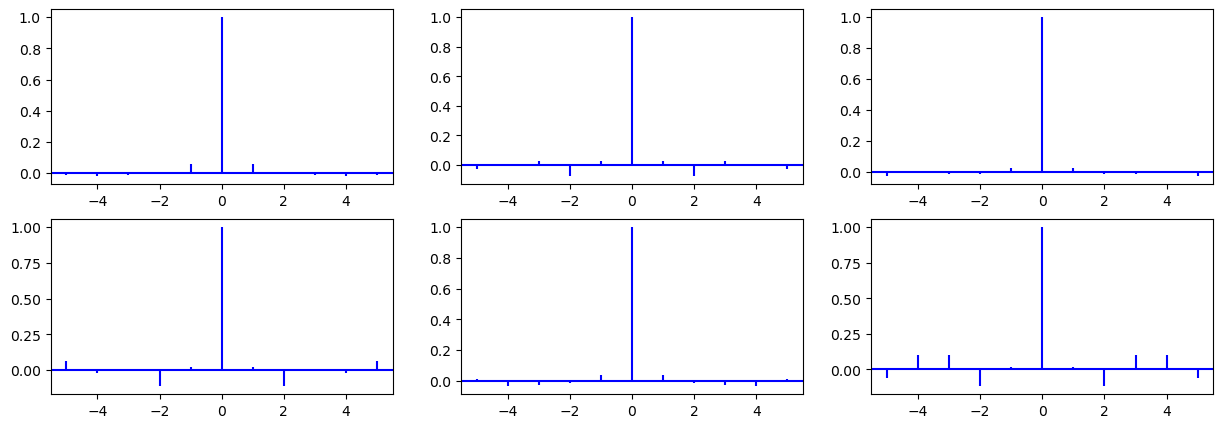

In [95]:
plt.subplots(figsize=(15,5))
plt.subplot(231)

plt.acorr(acorr1, maxlags = 5,color='blue')

plt.subplot(232)
plt.acorr(acorr2, maxlags = 5,color='blue')

plt.subplot(233)
plt.acorr(acorr3, maxlags = 5,color='blue')

plt.subplot(234)
plt.acorr(acorr4, maxlags = 5,color='blue')

plt.subplot(235)
plt.acorr(acorr5, maxlags = 5,color='blue')

plt.subplot(236)
plt.acorr(acorr6, maxlags = 5,color='blue')

plt.show()


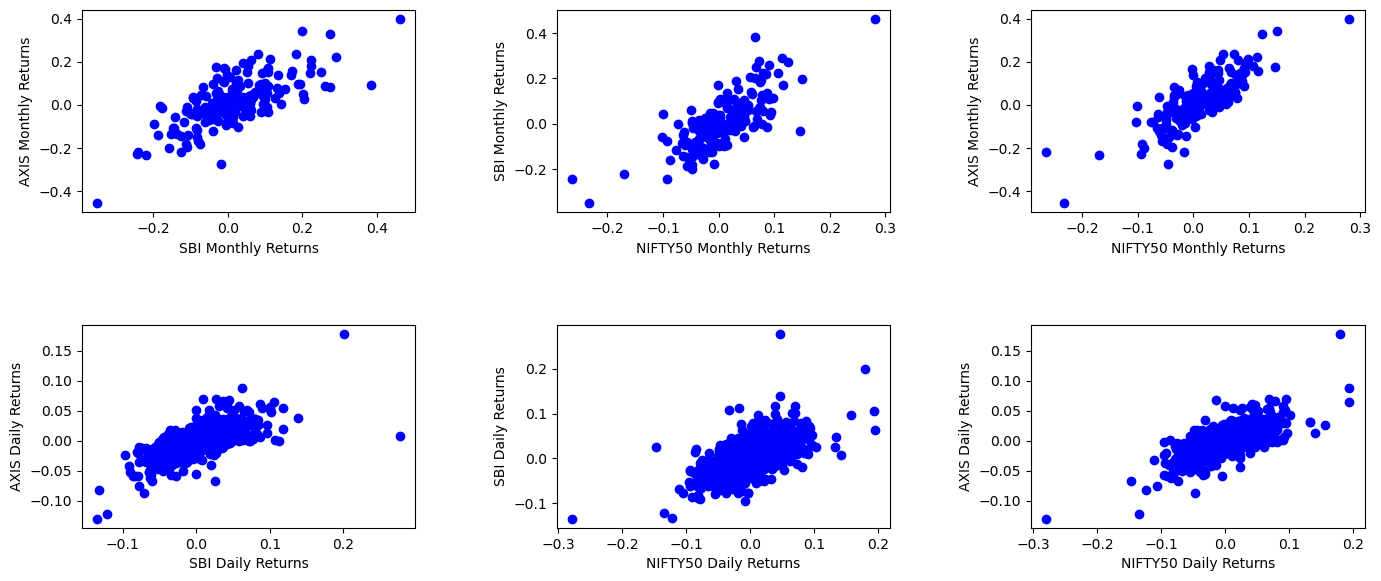

In [96]:
plt.subplots(figsize=(15,7))

plt.subplot(231)
plt.scatter(monthly_data["sbiMonthlyReturns"],monthly_data["axisMonthlyReturns"],color='blue')
plt.xlabel("SBI Monthly Returns")
plt.ylabel("AXIS Monthly Returns")

plt.subplot(232)
plt.scatter(monthly_data["nifty50MonthlyReturns"],monthly_data["sbiMonthlyReturns"],color='blue')
plt.xlabel("NIFTY50 Monthly Returns")
plt.ylabel("SBI Monthly Returns")

plt.subplot(233)
plt.scatter(monthly_data["nifty50MonthlyReturns"],monthly_data["axisMonthlyReturns"],color='blue')
plt.xlabel("NIFTY50 Monthly Returns")
plt.ylabel("AXIS Monthly Returns")

plt.subplot(234)
plt.scatter(daily_data["sbiDailyReturns"],daily_data["axisDailyReturns"],color='blue')
plt.xlabel("SBI Daily Returns")
plt.ylabel("AXIS Daily Returns")


plt.subplot(235)
plt.scatter(daily_data["nifty50DailyReturns"],daily_data["sbiDailyReturns"],color='blue')
plt.xlabel("NIFTY50 Daily Returns")
plt.ylabel("SBI Daily Returns")

plt.subplot(236)
plt.scatter(daily_data["nifty50DailyReturns"],daily_data["axisDailyReturns"],color='blue')
plt.xlabel("NIFTY50 Daily Returns")
plt.ylabel("AXIS Daily Returns")

plt.tight_layout(pad=5)

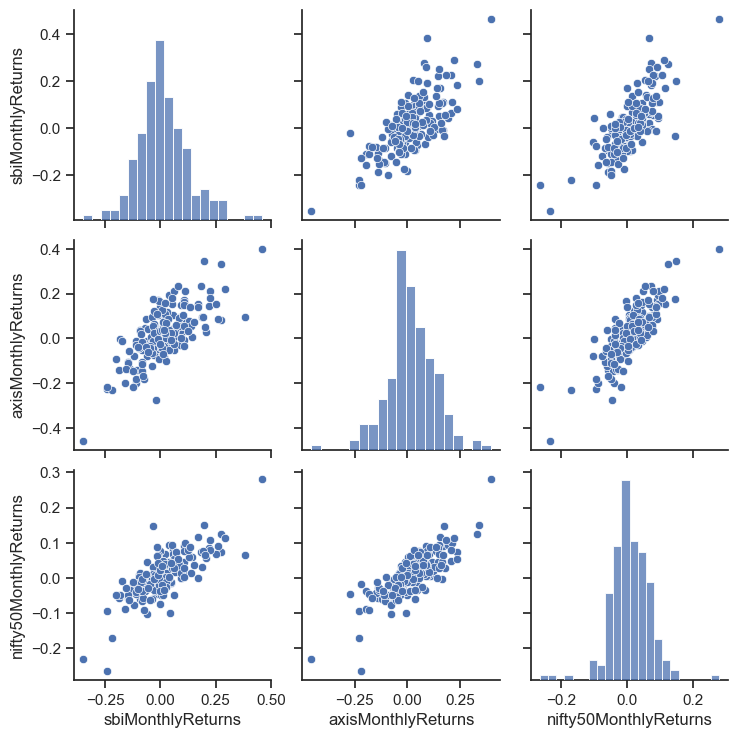

In [97]:
sns.set_theme(style="ticks")
sns.pairplot(df)
plt.rcParams['figure.figsize']=(10,10)

In [98]:
df.cov()

,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns
sbiMonthlyReturns,0.013179,0.009653,0.005313
axisMonthlyReturns,0.009653,0.013309,0.005734
nifty50MonthlyReturns,0.005313,0.005734,0.003773


In [99]:
df_daily.cov()

,sbiDailyReturns,axisDailyReturns,nifty50DailyReturns
sbiDailyReturns,0.000558,0.000226,0.000375
axisDailyReturns,0.000226,0.000189,0.000252
nifty50DailyReturns,0.000375,0.000252,0.000669


In [100]:
df.corr()

,sbiMonthlyReturns,axisMonthlyReturns,nifty50MonthlyReturns
sbiMonthlyReturns,1.000000,0.728856,0.753439
axisMonthlyReturns,0.728856,1.000000,0.809116
nifty50MonthlyReturns,0.753439,0.809116,1.000000


In [101]:
df_daily.corr()

,sbiDailyReturns,axisDailyReturns,nifty50DailyReturns
sbiDailyReturns,1.000000,0.697649,0.613665
axisDailyReturns,0.697649,1.000000,0.709828
nifty50DailyReturns,0.613665,0.709828,1.000000


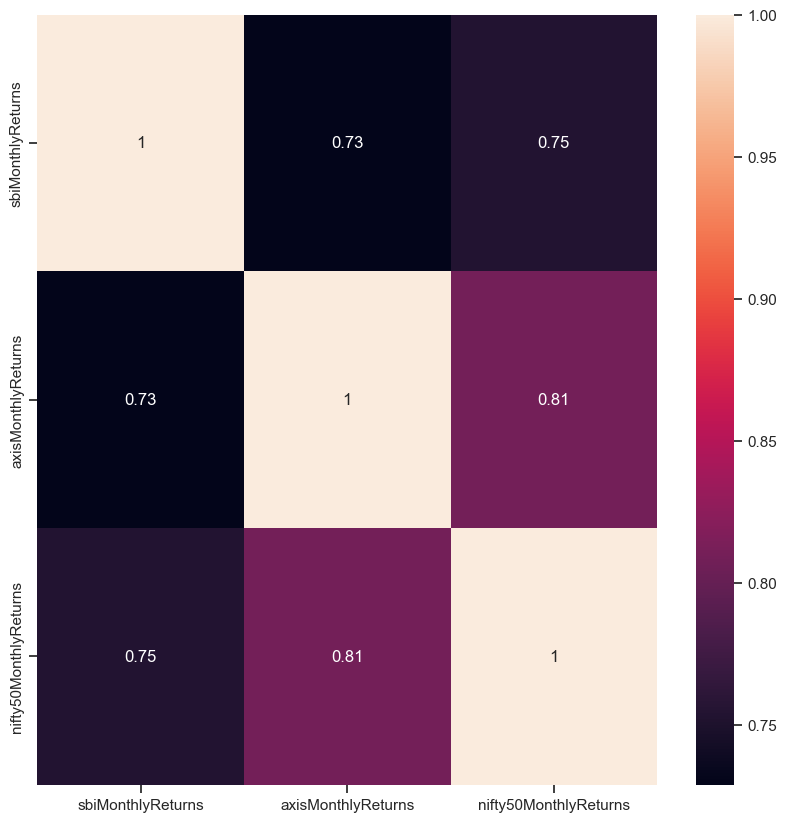

In [102]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset

 
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)